# Analiza Przedstawicieli handlowych
Załadowanie biblioteki

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc

# Połączenie z bazą SQL

In [5]:
conn = pyodbc.connect ('DRIVER={SQL Server};SERVER=WIN-KNV22QSAF5I\PRACA_DYPLOMOWA;DATABASE=AdventureWorks2017;Trusted_Connection=yes;')

# Załadowanie danych

In [10]:
query = "SELECT * FROM SalesPersonSales"

sps = pd.read_sql(query, conn)
pd.options.display.float_format = '${:,.2f}'.format
print(sps.head())
sps.head()

                FullName              JobTitle Gender        Country  \
0   Reiter, Michael Tsvi  Sales Representative      M  United States   
1   Reiter, Michael Tsvi  Sales Representative      M  United States   
2  Saraiva, Edvaldo José  Sales Representative      M         Canada   
3  Saraiva, Edvaldo José  Sales Representative      M         Canada   
4      Mitchell, C Linda  Sales Representative      F  United States   

   SalesOrderID  OrderDate    DueDate   ShipDate SalesOrderNumber  \
0         43659 2011-05-31 2011-06-12 2011-06-07          SO43659   
1         43660 2011-05-31 2011-06-12 2011-06-07          SO43660   
2         43661 2011-05-31 2011-06-12 2011-06-07          SO43661   
3         43662 2011-05-31 2011-06-12 2011-06-07          SO43662   
4         43663 2011-05-31 2011-06-12 2011-06-07          SO43663   

  PurchaseOrderNumber   AccountNumber   SubTotal    TaxAmt  Freight   TotalDue  
0         PO522145787  10-4020-000676 $20,565.62 $1,971.51  $616.10 $23

,FullName,JobTitle,Gender,Country,SalesOrderID,OrderDate,DueDate,ShipDate,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,SubTotal,TaxAmt,Freight,TotalDue
0,"Reiter, Michael Tsvi",Sales Representative,M,United States,43659,2011-05-31,2011-06-12,2011-06-07,SO43659,PO522145787,10-4020-000676,"$20,565.62","$1,971.51",$616.10,"$23,153.23"
1,"Reiter, Michael Tsvi",Sales Representative,M,United States,43660,2011-05-31,2011-06-12,2011-06-07,SO43660,PO18850127500,10-4020-000117,"$1,294.25",$124.25,$38.83,"$1,457.33"
2,"Saraiva, Edvaldo José",Sales Representative,M,Canada,43661,2011-05-31,2011-06-12,2011-06-07,SO43661,PO18473189620,10-4020-000442,"$32,726.48","$3,153.77",$985.55,"$36,865.80"
3,"Saraiva, Edvaldo José",Sales Representative,M,Canada,43662,2011-05-31,2011-06-12,2011-06-07,SO43662,PO18444174044,10-4020-000227,"$28,832.53","$2,775.16",$867.24,"$32,474.93"
4,"Mitchell, C Linda",Sales Representative,F,United States,43663,2011-05-31,2011-06-12,2011-06-07,SO43663,PO18009186470,10-4020-000510,$419.46,$40.27,$12.58,$472.31


# Statystyki podstawowe

In [11]:
describe_sps = sps.filter(['SubTotal', 'TaxAmt', 'Freight', 'TotalDue'])
describe_sps.describe()

,SubTotal,TaxAmt,Freight,TotalDue
count,"$31,465.00","$31,465.00","$31,465.00","$31,465.00"
mean,"$3,491.07",$323.76,$101.17,"$3,916.00"
std,"$11,093.45","$1,085.05",$339.08,"$12,515.46"
min,$1.37,$0.11,$0.03,$1.52
25%,$56.97,$4.56,$1.42,$62.95
50%,$782.99,$62.64,$19.57,$865.20
75%,"$2,366.96",$189.60,$59.25,"$2,615.49"
max,"$163,930.39","$17,948.52","$5,608.91","$187,487.83"


# Statystyki w podziale na grupy

In [12]:
name_mean = sps.filter(['FullName', 'TotalDue']).groupby('FullName').mean()
name_mean

,TotalDue
FullName,
"Abbas, E Syed","$1,221.11"
"Alberts, E Amy","$1,697.30"
"Ansman-Wolfe, O Pamela","$3,379.16"
"Blythe, G Michael","$6,185.58"
"Campbell, R David","$3,497.94"
"Carson, Jillian","$6,521.07"
"Ito, K Shu","$5,095.41"
"Jiang, Y Stephen","$1,929.23"
"Mensa-Annan, A Tete","$2,652.21"


In [13]:
name_sum = sps.filter(['FullName', 'TotalDue']).groupby('FullName').sum()
name_sum

,TotalDue
FullName,
"Abbas, E Syed","$3,770,778.08"
"Alberts, E Amy","$2,673,240.95"
"Ansman-Wolfe, O Pamela","$5,514,787.01"
"Blythe, G Michael","$12,290,756.36"
"Campbell, R David","$6,037,446.44"
"Carson, Jillian","$13,107,342.10"
"Ito, K Shu","$9,064,735.79"
"Jiang, Y Stephen","$3,057,824.64"
"Mensa-Annan, A Tete","$4,445,100.67"


In [14]:
summary_name = name_sum.merge(name_mean, how = 'inner', on = 'FullName', suffixes = ('_sum', '_mean') )
summary_name

,TotalDue_sum,TotalDue_mean
FullName,,
"Abbas, E Syed","$3,770,778.08","$1,221.11"
"Alberts, E Amy","$2,673,240.95","$1,697.30"
"Ansman-Wolfe, O Pamela","$5,514,787.01","$3,379.16"
"Blythe, G Michael","$12,290,756.36","$6,185.58"
"Campbell, R David","$6,037,446.44","$3,497.94"
"Carson, Jillian","$13,107,342.10","$6,521.07"
"Ito, K Shu","$9,064,735.79","$5,095.41"
"Jiang, Y Stephen","$3,057,824.64","$1,929.23"
"Mensa-Annan, A Tete","$4,445,100.67","$2,652.21"


In [15]:
summary_name = summary_name.reset_index()
summary_name

,FullName,TotalDue_sum,TotalDue_mean
0,"Abbas, E Syed","$3,770,778.08","$1,221.11"
1,"Alberts, E Amy","$2,673,240.95","$1,697.30"
2,"Ansman-Wolfe, O Pamela","$5,514,787.01","$3,379.16"
3,"Blythe, G Michael","$12,290,756.36","$6,185.58"
4,"Campbell, R David","$6,037,446.44","$3,497.94"
5,"Carson, Jillian","$13,107,342.10","$6,521.07"
6,"Ito, K Shu","$9,064,735.79","$5,095.41"
7,"Jiang, Y Stephen","$3,057,824.64","$1,929.23"
8,"Mensa-Annan, A Tete","$4,445,100.67","$2,652.21"
9,"Mitchell, C Linda","$13,464,105.48","$6,887.01"


Text(0, 0.5, 'in millions')

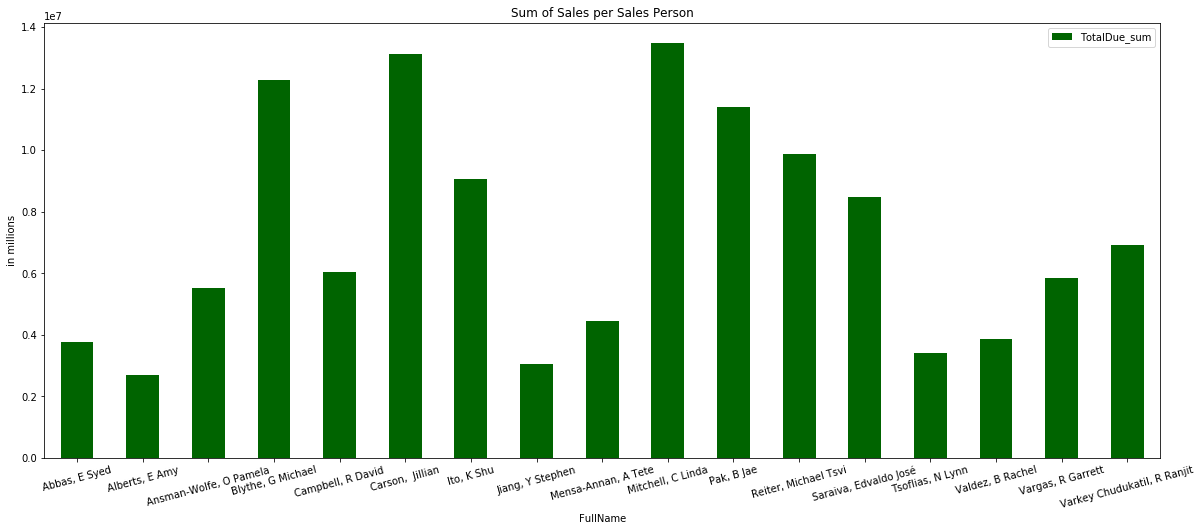

In [21]:
summary_name.plot.bar (x = 'FullName', y = 'TotalDue_sum', rot = 15, figsize = (20, 8), color = 'darkgreen')
plt.legend()
plt.title('Sum of Sales per Sales Person')
plt.ylabel('in millions')

In [36]:
gender_mean = sps.filter(['Gender', 'TotalDue']).groupby('Gender').mean()
gender_mean = gender_mean.reset_index()
gender_mean = gender_mean.replace(to_replace = 'F', value = 'Female')
gender_mean = gender_mean.replace(to_replace = 'M', value = 'Male')
gender_mean

,Gender,TotalDue
0,Female,"$4,318.79"
1,Male,"$3,655.13"


Text(0.5, 1.0, 'Sales by gender')

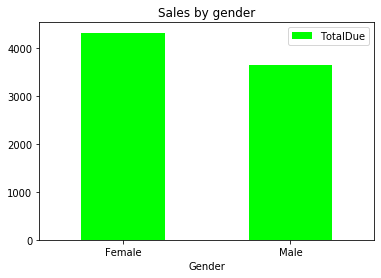

In [37]:
gender_mean.plot.bar (x = 'Gender', y = 'TotalDue', rot = 0, color = 'lime')
plt.legend()
plt.title('Sales by gender')